# Naive Bayes
# Machine Learning Model on Salary Dataset

Naive Bayes is a simple probabilistic classifier based on Bayes' theorem with the "naive" assumption of independence between features. It is widely used in machine learning for classification tasks due to its simplicity, speed, and ability to handle large datasets with high dimensionality. 

The algorithm is called "naive" because it assumes that the presence of a particular feature in a class is unrelated to the presence of any other feature. Despite this simplification, Naive Bayes often performs well in practice, especially in text classification and spam filtering.

Here's a breakdown of key aspects:
1. **Bayes' Theorem**: It calculates the probability of a hypothesis given the evidence using prior knowledge and conditional probabilities. Mathematically, it's represented as:
   \[ P(A|B) = \frac{P(B|A) \times P(A)}{P(B)} \]
   where:
   - \( P(A|B) \) is the probability of A given B.
   - \( P(B|A) \) is the probability of B given A.
   - \( P(A) \) and \( P(B) \) are the probabilities of A and B independently.
2. **Independence Assumption**: Naive Bayes assumes that all features are independent of each other given the class variable. This means that the presence of a particular feature in a class is unrelated to the presence of any other feature.
3. **Data Requirements**: Naive Bayes requires labeled training data, meaning you need a dataset where each instance is associated with a class label. The data should also have features that are independent of each other given the class labels. This assumption may not always hold true in real-world datasets, but Naive Bayes can still perform reasonably well even when the independence assumption is violated.
4. **Where to Use**:
   - Text classification: Naive Bayes classifiers are widely used in text classification tasks such as spam filtering, sentiment analysis, and document categorization.
   - Recommendation systems: Naive Bayes can be used to build recommendation systems by classifying items based on user preferences or behavior.
   - Medical diagnosis: It can be used in medical diagnosis systems to classify patients into different disease categories based on symptoms and test results.
   - Fraud detection: Naive Bayes can be applied in fraud detection systems to classify transactions as either fraudulent or legitimate based on various features.

Naive Bayes is a popular choice for many classification tasks due to its simplicity, ease of implementation, and efficiency, especially when dealing with large datasets with many features. However, it may not perform as well as more complex algorithms in scenarios where the independence assumption does not hold or when the feature space is highly correlated.

### Import Libraries

In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import GaussianNB

### Import Dataset

In [93]:
df = pd.read_csv('D:\\Data Practice JN\\Pre-Processing\\Wrangled Data of Social Media Ads.csv')
df

,Unnamed: 0,Gender,Age,EstimatedSalary,Purchased,Box-Cox_X,Box-Cox_Y,Yeo-Johnson_X,Yeo-Johnson_Y,Quantile_X,Quantile_Y
0,0,0,19.0,69987.0,0,-1.980702,0.133869,-1.980702,0.133869,-2.052715,-0.012565
1,1,0,37.0,20000.0,0,0.001299,-1.770340,0.001299,-1.770340,-0.006282,-1.749524
2,2,1,26.0,43000.0,0,-1.137619,-0.741294,-1.137619,-0.741294,-1.073141,-0.704369
3,3,1,37.0,57000.0,0,0.001299,-0.259357,0.001299,-0.259357,-0.006282,-0.326084
4,4,0,19.0,76000.0,0,-1.980702,0.302718,-1.980702,0.302718,-2.052715,0.289852
...,...,...,...,...,...,...,...,...,...,...,...
395,395,1,46.0,41000.0,1,0.821376,-0.816635,0.821376,-0.816635,0.716498,-0.787349
396,396,0,51.0,23000.0,1,1.245128,-1.608888,1.245128,-1.608888,1.186084,-1.456106
397,397,1,50.0,20000.0,1,1.161960,-1.770340,1.161960,-1.770340,1.142773,-1.749524
398,398,0,36.0,33000.0,0,-0.095203,-1.139506,-0.095203,-1.139506,-0.125978,-0.987682


In [94]:
df.drop(columns=['Unnamed: 0','Box-Cox_X','Box-Cox_Y','Yeo-Johnson_X','Yeo-Johnson_Y','Quantile_X','Quantile_Y'], inplace=True)
df.head()

,Gender,Age,EstimatedSalary,Purchased
0,0,19.0,69987.0,0
1,0,37.0,20000.0,0
2,1,26.0,43000.0,0
3,1,37.0,57000.0,0
4,0,19.0,76000.0,0


## Model Building

### Define Features and Labels

In [95]:
x= df.iloc[ : ,:-1]
y= df.iloc[ : ,-1:]

In [96]:
x

,Gender,Age,EstimatedSalary
0,0,19.0,69987.0
1,0,37.0,20000.0
2,1,26.0,43000.0
3,1,37.0,57000.0
4,0,19.0,76000.0
...,...,...,...
395,1,46.0,41000.0
396,0,51.0,23000.0
397,1,50.0,20000.0
398,0,36.0,33000.0


In [97]:
y

,Purchased
0,0
1,0
2,0
3,0
4,0
...,...
395,1
396,1
397,1
398,0


### Train Test Split

In [98]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=0)

In [99]:
x_test

,Gender,Age,EstimatedSalary
132,0,30.0,87000.0
309,1,38.0,50000.0
341,0,35.0,75000.0
196,1,30.0,79000.0
246,1,35.0,50000.0
...,...,...,...
216,0,49.0,65000.0
259,1,45.0,131000.0
49,1,31.0,89000.0
238,1,46.0,82000.0


In [100]:
y_test

,Purchased
132,0
309,0
341,0
196,0
246,0
...,...
216,0
259,1
49,0
238,0


In [101]:
x_train

,Gender,Age,EstimatedSalary
92,0,26.0,15000.0
223,0,60.0,102000.0
234,1,38.0,112000.0
232,0,40.0,107000.0
377,1,42.0,53000.0
...,...,...,...
323,1,48.0,30000.0
192,0,29.0,43000.0
117,0,36.0,52000.0
47,1,27.0,54000.0


In [102]:
y_train

,Purchased
92,0
223,1
234,0
232,1
377,0
...,...
323,1
192,0
117,0
47,0


### Model Fitting

In [105]:
model = GaussianNB()
model.fit(x_train, y_train)

c:\Users\ALICOM4\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

### Prediction

In [106]:
model.predict([[0, 25, 26000]])

c:\Users\ALICOM4\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

In [107]:
model.predict([[1, 25, 26000]])

c:\Users\ALICOM4\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

In [108]:
model.predict([[1, 35, 26000]])

c:\Users\ALICOM4\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

In [112]:
model.predict([[0, 45, 26000000]])

c:\Users\ALICOM4\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

In [124]:
y_pred = model.predict(x_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 1], dtype=int64)

### Evaluation Of Model

In [120]:
print('Training Score of Model =',model.score(x_train, y_train)*100)
print('Testing Score of Model = ',model.score(x_test, y_test)*100)

Training Score of Model = 87.85714285714286
Testing Score of Model =  88.33333333333333


### Plot

In [117]:
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, y_pred)
cm

array([[74,  5],
       [ 9, 32]], dtype=int64)

In [119]:
score = metrics.accuracy_score(y_test, y_pred)
print('Gaussian Naive Bayes Model Accuracy (in %):', metrics.accuracy_score(y_test, y_pred)*100)

Gaussian Naive Bayes Model Accuracy (in %): 88.33333333333333


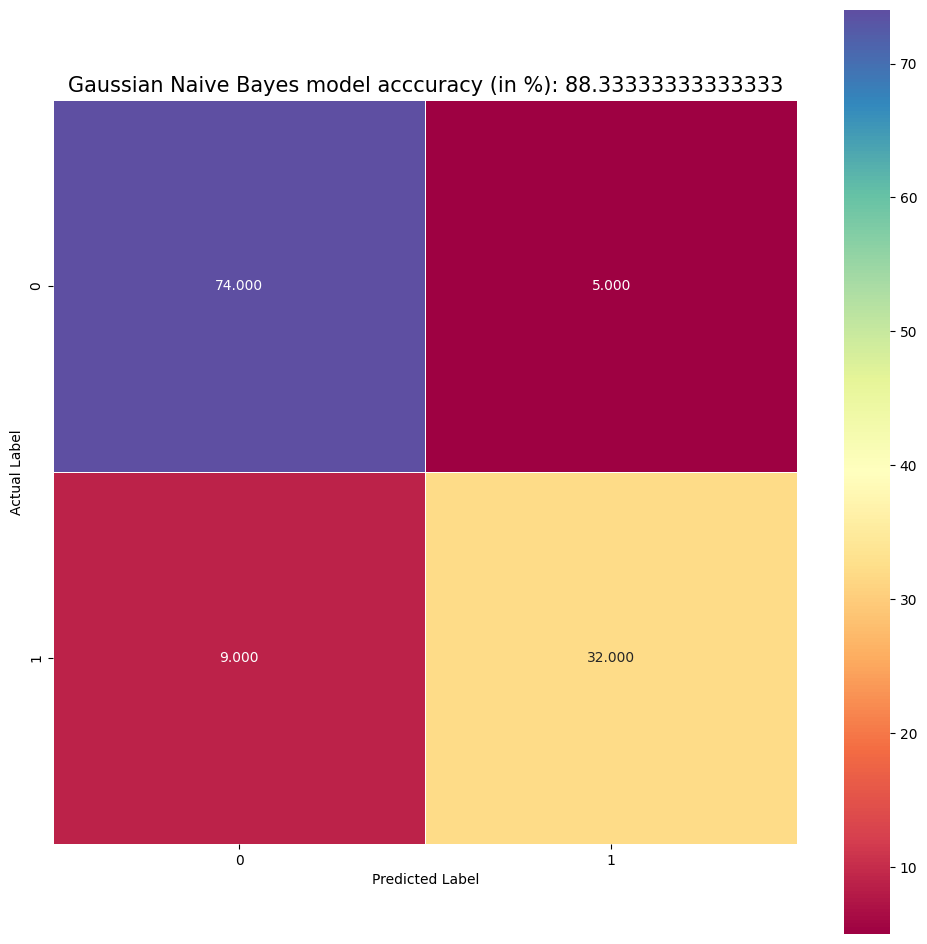

In [123]:
plt.figure(figsize=(12,12))
sns.heatmap(cm, annot=True, fmt='.3f', linewidths=.5, square=True, cmap = 'Spectral' )
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
all_sample_title= 'Gaussian Naive Bayes model acccuracy (in %): {0}'.format(score*100)
plt.title(all_sample_title, size=15)
plt.show()